# 동작구 Analysis : 크롤링한 데이터를 다중회귀분석하고 머신러닝으로 학습하기

앞서 수집한 데이터 csv를 불러와서 분석에 알맞게 가공하고, 다중회귀분석(다차원의 x가 존재하는 회귀)을 test,data셋으로 나누어 정확도를 높인다. 사용할 model과 손실함수는 ~

Reference
http://hleecaster.com/ml-multiple-linear-regression-example/

In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

In [32]:
df1 = pd.read_csv("Dongjak_Bigdata(동작구).csv")
df2 = pd.read_csv("Dongjak_Bigdata_review(동작구).csv")

In [33]:
df1 = DataFrame(df1)
df2 = DataFrame(df2)

## 빅데이터 검색결과 크롤링

### csv에서 필요한 부분만 데이터프레임으로 만들기

In [34]:
df1

,Unnamed: 0,place_name,tour_element,tour_element_name,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,0,달마사,음식점,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,달마사,음식점,홍익돈까스 중앙대점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,달마사,음식점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,달마사,음식점,마루스시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,달마사,음식점,동경야네,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114,5114,효사정,쇼핑,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5115,5115,효사정,쇼핑,을지로이야기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5116,5116,효사정,쇼핑,지구종합인테리어,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5117,5117,효사정,쇼핑,진흥마트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df1_=df1.loc[:5119 ,['place_name','tour_element','tour_element_name']]

In [37]:
df1_

,place_name,tour_element,tour_element_name
0,달마사,음식점,889
1,달마사,음식점,홍익돈까스 중앙대점
2,달마사,음식점,NaN
3,달마사,음식점,마루스시
4,달마사,음식점,동경야네
...,...,...,...
5114,효사정,쇼핑,NaN
5115,효사정,쇼핑,을지로이야기
5116,효사정,쇼핑,지구종합인테리어
5117,효사정,쇼핑,진흥마트


### 검색결과 없는 (tour_element_name=0) 인덱스 제거하기

In [38]:
df1__=df1_[df1_['tour_element_name']== '0'].index
df1__=df1_.drop(df1__)
df1__

,place_name,tour_element,tour_element_name
0,달마사,음식점,889
1,달마사,음식점,홍익돈까스 중앙대점
2,달마사,음식점,NaN
3,달마사,음식점,마루스시
4,달마사,음식점,동경야네
...,...,...,...
5114,효사정,쇼핑,NaN
5115,효사정,쇼핑,을지로이야기
5116,효사정,쇼핑,지구종합인테리어
5117,효사정,쇼핑,진흥마트


In [39]:
df3=df1__.groupby([df1__.place_name,df1__.tour_element])
df3_=df3.count()

In [40]:
df3_

tour_element_name
place_name tour_element                   
달마사        공원                           20
           관광명소                          1
           교통                           26
           쇼핑                          183
           숙소                           16
           술집                          166
           음식점                         262
           주차시설                         26
           카페                          183
           화장실                          42
사육신공원      공원                           23
           관광명소                          3
           교통                           24
           쇼핑                          183
           숙소                           38
           술집                          171
           음식점                         242
           주차시설                         54
           카페                          180
           화장실                          41
사자암        공원                           30
           교통                           57
           쇼핑                          183
           숙소                          105
           술집                          171
           음식점                         242
           주차시설                         58
           카페                          180
           화장실                          47
효사정        공원                           23
           교통                           32
           쇼핑                          225
           숙소                           25
           술집                          170
           음식점                         245
           주차시설                         31
           카페                          183
           화장실                          59

In [41]:
#pivot
df3__=df3_.pivot_table(index='place_name', columns='tour_element', values='tour_element_name')
df3__

tour_element,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실
place_name,,,,,,,,,,
달마사,20.0,1.0,26.0,183.0,16.0,166.0,262.0,26.0,183.0,42.0
사육신공원,23.0,3.0,24.0,183.0,38.0,171.0,242.0,54.0,180.0,41.0
사자암,30.0,NaN,57.0,183.0,105.0,171.0,242.0,58.0,180.0,47.0
효사정,23.0,NaN,32.0,225.0,25.0,170.0,245.0,31.0,183.0,59.0


In [42]:
#결측값 0으로 채우기
df_0 = df3__.fillna(0)

In [44]:
df_0.loc[5]=['국립서울현충원',21,1,28,240,18,226,285,56,237,58,1788]


ValueError: cannot set a row with mismatched columns

In [45]:
df_0

tour_element,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실
place_name,,,,,,,,,,
달마사,20.0,1.0,26.0,183.0,16.0,166.0,262.0,26.0,183.0,42.0
사육신공원,23.0,3.0,24.0,183.0,38.0,171.0,242.0,54.0,180.0,41.0
사자암,30.0,0.0,57.0,183.0,105.0,171.0,242.0,58.0,180.0,47.0
효사정,23.0,0.0,32.0,225.0,25.0,170.0,245.0,31.0,183.0,59.0


In [17]:
df_0.shape

(394, 10)

## 빅데이터 리뷰 크롤링

### csv파일에서 필요한 데이터 부분만 데이터프레임으로 만들기

In [46]:
df2

,Unnamed: 0,place_name,review
0,0,달마사,87
1,1,사육신공원,299
2,2,사자암,33
3,3,서울현충원호국지장사,24
4,4,효사정,83


In [58]:
df2_=df2.loc[:4,['place_name','review']]

In [59]:
df2_

,place_name,review
0,달마사,87
1,사육신공원,299
2,사자암,33
3,서울현충원호국지장사,24
4,효사정,83


In [60]:
Dongjak_Dataframe=pd.merge(df_0,df2_,on='place_name',how='inner')

In [61]:
Dongjak_Dataframe

,place_name,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실,review
0,달마사,20.0,1.0,26.0,183.0,16.0,166.0,262.0,26.0,183.0,42.0,87
1,사육신공원,23.0,3.0,24.0,183.0,38.0,171.0,242.0,54.0,180.0,41.0,299
2,사자암,30.0,0.0,57.0,183.0,105.0,171.0,242.0,58.0,180.0,47.0,33
3,효사정,23.0,0.0,32.0,225.0,25.0,170.0,245.0,31.0,183.0,59.0,83


In [62]:
Dongjak_Dataframe.loc[4]=['국립서울현충원',21,1,28,240,18,226,285,56,237,58,1788]

In [63]:
Dongjak_Dataframe

,place_name,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실,review
0,달마사,20.0,1.0,26.0,183.0,16.0,166.0,262.0,26.0,183.0,42.0,87
1,사육신공원,23.0,3.0,24.0,183.0,38.0,171.0,242.0,54.0,180.0,41.0,299
2,사자암,30.0,0.0,57.0,183.0,105.0,171.0,242.0,58.0,180.0,47.0,33
3,효사정,23.0,0.0,32.0,225.0,25.0,170.0,245.0,31.0,183.0,59.0,83
4,국립서울현충원,21.0,1.0,28.0,240.0,18.0,226.0,285.0,56.0,237.0,58.0,1788


In [64]:
Dongjak_Dataframe.to_csv("동작구.csv.",mode='w')

In [23]:
#결측값 0으로 채우기
Dongjak_df= Dongjak_Dataframe.fillna(0)

In [24]:
Dongjak_df

,place_name,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실,review
0,가산서원,1.0,2.0,18.0,225.0,5.0,216.0,1.0,123.0,0.0,122.0,0.0
1,가실성당,0.0,0.0,20.0,29.0,0.0,0.0,19.0,0.0,4.0,0.0,255.0
2,가야진사,0.0,0.0,6.0,19.0,4.0,2.0,28.0,0.0,4.0,6.0,77.0
3,가평리 계서당,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
4,가평향교,2.0,3.0,0.0,225.0,32.0,17.0,258.0,5.0,59.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
458,장산서원,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
459,망이산성,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,양송천묘역,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
461,평강성서유물 박물관,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [23]:
#데이터 합하고, review랑 연결
#Dongjak_df.to_csv("result.csv",mode='w')

결과 데이터셋을 보고, 중복된 것은 삭제하고 결과가 이상하게 나온 것은 키워드를 바꿔서 다시 돌린다. 398~457

In [25]:
#중복 행 제거
result=Dongjak_df.drop_duplicates()
result1=result.reset_index(drop=True,inplace=False)
result1

,place_name,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실,review
0,가산서원,1.0,2.0,18.0,225.0,5.0,216.0,1.0,123.0,0.0,122.0,0.0
1,가실성당,0.0,0.0,20.0,29.0,0.0,0.0,19.0,0.0,4.0,0.0,255.0
2,가야진사,0.0,0.0,6.0,19.0,4.0,2.0,28.0,0.0,4.0,6.0,77.0
3,가평리 계서당,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
4,가평향교,2.0,3.0,0.0,225.0,32.0,17.0,258.0,5.0,59.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
452,장산서원,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
453,망이산성,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,양송천묘역,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
455,평강성서유물 박물관,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [26]:
result2=result1

result2=result2.drop(result2[result2['place_name']== '정지용 생가'].index)
result2=result2.drop(result2[result2['place_name']== '정혜사(순천)'].index)
result2=result2.drop(result2[result2['place_name']== '수도리 전통마을'].index)
result2=result2.drop(result2[result2['place_name']== '김상옥 생가'].index)
result2=result2.drop(result2[result2['place_name']== '개태사'].index)
    
result2_=result2.reset_index(drop=True,inplace=False) #인덱스 재정렬
result2_ #결과 데이터셋에서 중복데이터, 리뷰수가 이상한 데이터 지움

,place_name,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실,review
0,가산서원,1.0,2.0,18.0,225.0,5.0,216.0,1.0,123.0,0.0,122.0,0.0
1,가실성당,0.0,0.0,20.0,29.0,0.0,0.0,19.0,0.0,4.0,0.0,255.0
2,가야진사,0.0,0.0,6.0,19.0,4.0,2.0,28.0,0.0,4.0,6.0,77.0
3,가평리 계서당,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
4,가평향교,2.0,3.0,0.0,225.0,32.0,17.0,258.0,5.0,59.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
447,장산서원,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
448,망이산성,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,양송천묘역,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
450,평강성서유물 박물관,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [27]:
result2_.loc[393,'place_name']

'산청·함양사건 추모공원'

In [28]:
#재검색할 키워드 제거한 데이터프레임
Result=result2_.iloc[:393]
Result #공원,관광명소 등이 수집되지 않은 것 지움

,place_name,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실,review
0,가산서원,1.0,2.0,18.0,225.0,5.0,216.0,1.0,123.0,0.0,122.0,0.0
1,가실성당,0.0,0.0,20.0,29.0,0.0,0.0,19.0,0.0,4.0,0.0,255.0
2,가야진사,0.0,0.0,6.0,19.0,4.0,2.0,28.0,0.0,4.0,6.0,77.0
3,가평리 계서당,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
4,가평향교,2.0,3.0,0.0,225.0,32.0,17.0,258.0,5.0,59.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,환벽당,0.0,2.0,0.0,14.0,4.0,0.0,24.0,2.0,11.0,3.0,149.0
389,황학정,21.0,36.0,10.0,222.0,222.0,207.0,285.0,225.0,222.0,104.0,14.0
390,흑성산성,1.0,1.0,2.0,14.0,3.0,0.0,10.0,0.0,8.0,2.0,142.0
391,흥인지문,26.0,13.0,2.0,225.0,222.0,206.0,285.0,222.0,222.0,121.0,627.0


In [109]:
place_re=[] #재검색할 키워드

place_re=[result2_.loc[393+i,'place_name'] for i in range(0,59)]

In [110]:
place_re

['산청·함양사건 추모공원',
 '포항 장기읍성',
 '용천사(청도)',
 '용화사(고창)',
 '장안사(부산)',
 '화암사(완주)',
 '경주 무열왕릉, 태종무열왕릉비',
 '불암사(남양주)',
 '수로왕릉',
 '진천 배티 성지',
 '단양 온달산성',
 '미타사(음성)',
 '광명 영회원(민회빈)',
 '정토사(성남)',
 '흥국사(남양주)',
 '이효석문화마을',
 '도리사(구미)',
 '영덕 대소산 봉수대',
 '망해사(김제)',
 '성암사(부산)',
 '연풍성지',
 '등명락가사(강릉)',
 '무진정(함안)',
 '상원사(원주)',
 '내원사(양산)',
 '약사사(서울)',
 '해미순교성지',
 '고성 어명기 고택',
 '하강서원',
 '보은 속리 정이품송',
 '좌수영성지',
 '우일선 선교사 사택',
 '정읍 황토현 전적',
 '영월 정양산성',
 '만해 한용운선생 생가지',
 '황산전통한옥마을',
 '한티 순교성지',
 '창덕궁 인정문',
 '무주 지전마을 옛 담장',
 '고양 구 일산역사',
 '익산 춘포역사',
 '하회 겸암정사',
 '경주 장항리 서 오층석탑',
 '초의선사 유적지',
 '진천 김유신 탄생지와 태실',
 '원주 영원산성',
 '서울 헌릉과 인릉',
 '옛백제병원',
 '의성김씨학봉종택',
 '단재 신채호선생생가지',
 '해군영흥도 전적비',
 '칠곡향교대성전',
 '전주이씨광평대군파묘역',
 '반기문 유엔사무총장 생가마을',
 '장산서원',
 '망이산성',
 '양송천묘역',
 '평강성서유물 박물관',
 '홍의장군 곽망우당 묘소']

In [111]:
place_re.append('정지용 생가')
place_re.append('정혜사(순천)')
place_re.append('수도리 전통마을')
place_re.append('김상옥 생가')
place_re.append('개태사')

place_re

['산청·함양사건 추모공원',
 '포항 장기읍성',
 '용천사(청도)',
 '용화사(고창)',
 '장안사(부산)',
 '화암사(완주)',
 '경주 무열왕릉, 태종무열왕릉비',
 '불암사(남양주)',
 '수로왕릉',
 '진천 배티 성지',
 '단양 온달산성',
 '미타사(음성)',
 '광명 영회원(민회빈)',
 '정토사(성남)',
 '흥국사(남양주)',
 '이효석문화마을',
 '도리사(구미)',
 '영덕 대소산 봉수대',
 '망해사(김제)',
 '성암사(부산)',
 '연풍성지',
 '등명락가사(강릉)',
 '무진정(함안)',
 '상원사(원주)',
 '내원사(양산)',
 '약사사(서울)',
 '해미순교성지',
 '고성 어명기 고택',
 '하강서원',
 '보은 속리 정이품송',
 '좌수영성지',
 '우일선 선교사 사택',
 '정읍 황토현 전적',
 '영월 정양산성',
 '만해 한용운선생 생가지',
 '황산전통한옥마을',
 '한티 순교성지',
 '창덕궁 인정문',
 '무주 지전마을 옛 담장',
 '고양 구 일산역사',
 '익산 춘포역사',
 '하회 겸암정사',
 '경주 장항리 서 오층석탑',
 '초의선사 유적지',
 '진천 김유신 탄생지와 태실',
 '원주 영원산성',
 '서울 헌릉과 인릉',
 '옛백제병원',
 '의성김씨학봉종택',
 '단재 신채호선생생가지',
 '해군영흥도 전적비',
 '칠곡향교대성전',
 '전주이씨광평대군파묘역',
 '반기문 유엔사무총장 생가마을',
 '장산서원',
 '망이산성',
 '양송천묘역',
 '평강성서유물 박물관',
 '홍의장군 곽망우당 묘소',
 '정지용 생가',
 '정혜사(순천)',
 '수도리 전통마을',
 '김상옥 생가',
 '개태사']

In [112]:
#제대로 저장된 장소 텍스트 저장
place_allminusre=[]
place_allminusre=[Result.loc[i,'place_name'] for i in range(len(Result.place_name))]

In [114]:
place_allminusre

['가산서원',
 '가실성당',
 '가야진사',
 '가평리 계서당',
 '가평향교',
 '가학동지석묘',
 '갑사',
 '강릉 굴산사지',
 '강릉 임영관 삼문',
 '강릉향교',
 '강원 영월 김삿갓',
 '강진 병영마을 옛 담장',
 '강화산성',
 '경국사',
 '경산 임당동과 조영동 고분군',
 '경주 감은사지',
 '경주 김유신묘',
 '경주 남산 용장사곡 삼층석탑',
 '경주 배동 삼릉',
 '경주 선덕여왕릉',
 '경주 황룡사지',
 '경주민속공예촌',
 '경희궁 숭정전',
 '계룡 사계고택',
 '고려동유적지',
 '고령 지산동 고분군',
 '고성 학동마을 옛 담장',
 '고창신재효고택',
 '공주 석장리 유적',
 '과천향교',
 '관룡사',
 '관악산 낙성대공원',
 '광주 조선백자 요지',
 '광주공원',
 '광희문',
 '괴시리 전통마을',
 '교동향교',
 '구례 석주관성',
 '구룡포 근대문화역사관',
 '구미 채미정',
 '구암사',
 '국립 5.18 민주묘지',
 '국립임실호국원',
 '국청사',
 '국형사',
 '군산 개정면 구 일본인농장 창고',
 '군산항',
 '군위 인각사지',
 '귀신사',
 '금강대도',
 '금당사(진안)',
 '금룡사',
 '금산 칠백의총',
 '금산교회',
 '금탑사',
 '기림사',
 '기장향교',
 '김대중 대통령 생가',
 '김좌진장군생가지',
 '김포 수안산성',
 '김해 구지봉',
 '김해 분산성',
 '김해 수로왕비릉',
 '나주 반남 고분군',
 '나주향교',
 '낙동서원',
 '낙빈서원',
 '난계 박연선생 생가',
 '난고 김삿갓 유적지',
 '남간정사',
 '남고문',
 '남악서원',
 '남양주 사릉',
 '남원 교룡산성',
 '남원 만복사지',
 '남원 흥부마을',
 '남평문씨본리세거지',
 '내원사',
 '내원정사',
 '내장사',
 '너리굴 문화마을',
 '녹동서원',
 '논개사당',
 '논산명재고택',
 '능허대지',
 '단호사',
 '달성 삼가헌 고택',
 '달성사',
 '담

In [115]:
def write_txt(list,fname,sep):
    file=open(fname,'w')
    vstr=""

    for a in list:
        vstr = vstr+ str(a) + sep
    
    vstr =vstr.rstrip(sep)
    
    file.writelines(vstr)
    file.close()
    print('저장완료')

In [119]:
write_txt(place_allminusre,"place_allminusre500~1000.txt",sep='\n')

저장완료


In [120]:
write_txt(place_re,"place_re500~1000.txt",sep='\n')

저장완료


In [118]:
len(place_re)

64

## 재크롤링한것 dataframe 만들기

In [30]:
Df1 = pd.read_csv("Dongjak_Bigdata-re.csv.")
Df2 = pd.read_csv("Dongjak_Bigdata_review-re.csv")

In [31]:
Df1

,Unnamed: 0,place_name,tour_element,tour_element_name
0,0,산청함양사건 추모공원,음식점,동강횟집
1,1,산청함양사건 추모공원,음식점,양지 횟집
2,2,산청함양사건 추모공원,음식점,삼우가든
3,3,산청함양사건 추모공원,음식점,지리산양성식당
4,4,산청함양사건 추모공원,카페,0
...,...,...,...,...
14143,14143,개태사,쇼핑,보일랑보일러
14144,14144,개태사,쇼핑,부건옹기
14145,14145,개태사,쇼핑,NaN
14146,14146,개태사,쇼핑,스피노자논산점


In [32]:
Df2

,Unnamed: 0,place_name,review
0,0,산청함양사건 추모공원,13
1,1,영일장기읍성,69
2,2,청도 용천사,30
3,3,고창 용화사,0
4,4,장안사대웅전,6
...,...,...,...
58,58,정지용 생가,287
59,59,순천 정혜사,12
60,60,무섬마을,1081
61,61,김상옥 생가,0


In [38]:
Df1=Df1.loc[:14147 ,['place_name','tour_element','tour_element_name']]
Df1

,place_name,tour_element,tour_element_name
0,산청함양사건 추모공원,음식점,동강횟집
1,산청함양사건 추모공원,음식점,양지 횟집
2,산청함양사건 추모공원,음식점,삼우가든
3,산청함양사건 추모공원,음식점,지리산양성식당
4,산청함양사건 추모공원,카페,0
...,...,...,...
14143,개태사,쇼핑,보일랑보일러
14144,개태사,쇼핑,부건옹기
14145,개태사,쇼핑,NaN
14146,개태사,쇼핑,스피노자논산점


In [39]:
Df1_=Df1[Df1['tour_element_name']== '0'].index
Df1_=Df1.drop(Df1_)
Df1_

,place_name,tour_element,tour_element_name
0,산청함양사건 추모공원,음식점,동강횟집
1,산청함양사건 추모공원,음식점,양지 횟집
2,산청함양사건 추모공원,음식점,삼우가든
3,산청함양사건 추모공원,음식점,지리산양성식당
5,산청함양사건 추모공원,숙소,형제펜션민박
...,...,...,...
14143,개태사,쇼핑,보일랑보일러
14144,개태사,쇼핑,부건옹기
14145,개태사,쇼핑,NaN
14146,개태사,쇼핑,스피노자논산점


In [44]:
Df3=Df1_.groupby([Df1_.place_name,Df1_.tour_element])
Df3_=Df3.count()
Df3_

tour_element_name
place_name tour_element                   
개태사        관광명소                          1
           쇼핑                           39
           숙소                            8
           음식점                          19
           카페                            2
...                                    ...
흥국사        쇼핑                           10
           음식점                           9
           주차시설                          1
           카페                            1
           화장실                           2

[281 rows x 1 columns]

In [45]:
#pivot
Df3__=Df3_.pivot_table(index='place_name', columns='tour_element', values='tour_element_name')
Df3__

tour_element,공원,관광명소,쇼핑,숙소,술집,음식점,주차시설,카페,화장실
place_name,,,,,,,,,
개태사,NaN,1.0,39.0,8.0,NaN,19.0,NaN,2.0,NaN
경주 무열왕릉,2.0,NaN,63.0,15.0,8.0,94.0,6.0,23.0,3.0
경주 장항리 서 오층석탑,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,1.0
고성 어명기 고택,NaN,NaN,24.0,61.0,3.0,37.0,NaN,5.0,9.0
고창 용화사,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
곽재우장군묘소,2.0,NaN,12.0,NaN,NaN,7.0,NaN,1.0,1.0
구미 도리사,2.0,1.0,NaN,3.0,NaN,7.0,NaN,3.0,1.0
김유신 탄생지,1.0,1.0,8.0,3.0,1.0,10.0,NaN,1.0,2.0
김해 수로왕릉,38.0,NaN,225.0,88.0,186.0,285.0,NaN,222.0,7.0


In [46]:
#결측값 0으로 채우기
Df_0 = Df3__.fillna(0)
Df_0

tour_element,공원,관광명소,쇼핑,숙소,술집,음식점,주차시설,카페,화장실
place_name,,,,,,,,,
개태사,0.0,1.0,39.0,8.0,0.0,19.0,0.0,2.0,0.0
경주 무열왕릉,2.0,0.0,63.0,15.0,8.0,94.0,6.0,23.0,3.0
경주 장항리 서 오층석탑,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0
고성 어명기 고택,0.0,0.0,24.0,61.0,3.0,37.0,0.0,5.0,9.0
고창 용화사,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
곽재우장군묘소,2.0,0.0,12.0,0.0,0.0,7.0,0.0,1.0,1.0
구미 도리사,2.0,1.0,0.0,3.0,0.0,7.0,0.0,3.0,1.0
김유신 탄생지,1.0,1.0,8.0,3.0,1.0,10.0,0.0,1.0,2.0
김해 수로왕릉,38.0,0.0,225.0,88.0,186.0,285.0,0.0,222.0,7.0


In [47]:
Df2_=Df2.loc[:62,['place_name','review']]
Df2_

,place_name,review
0,산청함양사건 추모공원,13
1,영일장기읍성,69
2,청도 용천사,30
3,고창 용화사,0
4,장안사대웅전,6
...,...,...
58,정지용 생가,287
59,순천 정혜사,12
60,무섬마을,1081
61,김상옥 생가,0


In [48]:
DongjakDataframe=pd.merge(Df_0,Df2_,on='place_name',how='outer')

In [50]:
#결측값 0으로 채우기
DongjakDf= DongjakDataframe.fillna(0)
DongjakDf

,place_name,공원,관광명소,쇼핑,숙소,술집,음식점,주차시설,카페,화장실,review
0,개태사,0.0,1.0,39.0,8.0,0.0,19.0,0.0,2.0,0.0,214
1,경주 무열왕릉,2.0,0.0,63.0,15.0,8.0,94.0,6.0,23.0,3.0,265
2,경주 장항리 서 오층석탑,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,15
3,고성 어명기 고택,0.0,0.0,24.0,61.0,3.0,37.0,0.0,5.0,9.0,17
4,고창 용화사,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
58,무주 지전마을 옛 담장,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
59,안동하회마을겸암정사,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50
60,원주 영원산성,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
61,평강성서유물 박물관,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [53]:
DJ_df=pd.concat([Result,DongjakDf])
DJ_df=DJ_df.reset_index(drop=True,inplace=False)
DJ_df

,place_name,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실,review
0,가산서원,1.0,2.0,18.0,225.0,5.0,216.0,1.0,123.0,0.0,122.0,0.0
1,가실성당,0.0,0.0,20.0,29.0,0.0,0.0,19.0,0.0,4.0,0.0,255.0
2,가야진사,0.0,0.0,6.0,19.0,4.0,2.0,28.0,0.0,4.0,6.0,77.0
3,가평리 계서당,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
4,가평향교,2.0,3.0,0.0,225.0,32.0,17.0,258.0,5.0,59.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
451,무주 지전마을 옛 담장,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
452,안동하회마을겸암정사,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
453,원주 영원산성,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
454,평강성서유물 박물관,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [54]:
DJ_df.to_csv("Dongjak_result.csv",mode='w')

# 결과 분석

In [3]:
Ddf = pd.read_csv("fullResult.csv")

In [8]:
X = Ddf.iloc[:90,1:11].astype(float)
Y = Ddf['review'].loc[:89].astype(float)

In [9]:
X

,공원,관광명소,교통,쇼핑,숙소,술집,음식점,주차시설,카페,화장실
0,24.0,43.0,59.0,237.0,237.0,222.0,285.0,238.0,237.0,115.0
1,1.0,1.0,22.0,240.0,84.0,7.0,176.0,4.0,75.0,0.0
2,3.0,3.0,20.0,188.0,210.0,9.0,244.0,5.0,73.0,3.0
3,3.0,2.0,20.0,188.0,210.0,12.0,244.0,3.0,73.0,3.0
4,3.0,5.0,20.0,237.0,187.0,76.0,285.0,44.0,237.0,0.0
...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,13.0,14.0,9.0,0.0,29.0,0.0,5.0,8.0
86,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,1.0,5.0,20.0,170.0,50.0,5.0,118.0,4.0,53.0,0.0
88,0.0,1.0,0.0,9.0,12.0,1.0,19.0,0.0,3.0,0.0


In [10]:
Y

0     8744.0
1     6667.0
2     5750.0
3     5744.0
4     5517.0
       ...  
85     975.0
86     963.0
87     951.0
88     949.0
89     948.0
Name: review, Length: 90, dtype: float64

In [12]:
Ddf_=Ddf.iloc[:90,1:12]

In [13]:
corr=Ddf_.corr(method='pearson')
print(corr)

              공원      관광명소        교통        쇼핑        숙소        술집       음식점  \
공원      1.000000  0.746851  0.546702  0.641177  0.702460  0.835603  0.670973   
관광명소    0.746851  1.000000  0.671701  0.542806  0.770262  0.798354  0.578821   
교통      0.546702  0.671701  1.000000  0.465888  0.528954  0.648132  0.477672   
쇼핑      0.641177  0.542806  0.465888  1.000000  0.678292  0.769024  0.972861   
숙소      0.702460  0.770262  0.528954  0.678292  1.000000  0.797503  0.747774   
술집      0.835603  0.798354  0.648132  0.769024  0.797503  1.000000  0.812098   
음식점     0.670973  0.578821  0.477672  0.972861  0.747774  0.812098  1.000000   
주차시설    0.770101  0.927254  0.721846  0.634516  0.780181  0.897112  0.675895   
카페      0.773397  0.694473  0.569070  0.897471  0.797236  0.930250  0.933508   
화장실     0.782556  0.906094  0.690707  0.529192  0.689919  0.816779  0.560076   
review  0.182032  0.227550  0.333485  0.395719  0.373631  0.218022  0.395969   

            주차시설        카페       화장실   

In [ ]:
from scipy import stats
tTestResult = stats.ttest_ind(titanic_survived['age'], titanic_n_survived['age'])

tTestResultDiffVar = stats.ttest_ind(titanic_survived['age'], titanic_n_survived['age'], equal_var=False)


In [169]:
#데이터 나누기
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [170]:
# k값 변경에 따른 정확도
score=[]

for i in range(1,20,1):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(x_train,y_train)

    score.append(knn.score(x_test,y_test))

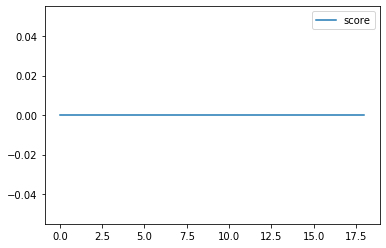

In [84]:
a = pd.DataFrame(score,columns=['score'])

a.plot(kind = 'line')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0, flags=flags)


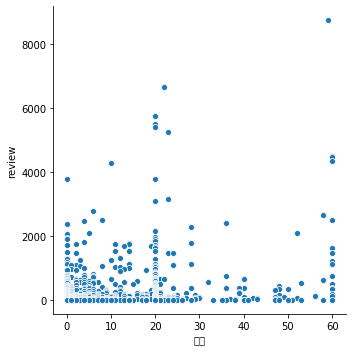

In [88]:
import seaborn as sns

sns.relplot(x="교통", y="review", data=Ddf)

In [92]:
def del_outlier(x):
    from_out = x.mean() -   x.std()
    to_out = x.mean() + 3 * x.std()
    
    x = x[(x>from_out) & (x<to_out)]
    
    print (from_out)
    print (to_out)
    
    return x
 
x = del_outlier(X)
y = del_outlier(Y)

관광명소    -32.354513
교통      -35.303980
숙소     -196.725033
dtype: float64
관광명소     47.265624
교통       72.526202
숙소      349.702811
dtype: float64
-2325.3501545719178
6536.283487905252


In [97]:
X['교통'].mean

<bound method Series.mean of 0     59
1     22
2     20
3     20
4     20
      ..
85    13
86    20
87    20
88     0
89     2
Name: 교통, Length: 90, dtype: int64>

In [171]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
r_sq = model.score(X, Y)
 
print(r_sq)
print(model.coef_)

0.5573697827952397
[ 26.30140802  43.53704462  19.15521664   4.27428547   8.1298167
 -18.61044448   5.3047424   14.76111663  -1.26971022 -30.97649855]


tensorflow로 회귀분석하기

In [144]:
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
a3 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
a4 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
a5 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
a6 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
a7 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
a8 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
a9 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
a10 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('a1 = {}, a2 = {}, b = {}'.format(sess.run(a1), sess.run(a2), sess.run(b)))


a1 = [4.05366643], a2 = [8.86602852], b = [93.6549664]


In [163]:
import tensorflow as tf

#y = a1 * X.공원 + a2 * X.관광명소 + a3 * X.교통 + a4 * X.쇼핑 + a5 * X.숙소 + a6 * X.술집 + a7 * X.음식점 + a8 * X.주차시설 + a9 * X.카페 + a10 * X.화장실 + b

y =   a2 * X.관광명소 + a3 * X.교통  + a5 * X.숙소 + b


cost = tf.sqrt(tf.reduce_mean(tf.square(y - Y))) #표준오차
a = tf.Variable(1) #alpha, learning rate
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)


In [164]:
import time

with tf.Session() as sess:
    # 변수를 초기화
    sess.run(tf.global_variables_initializer())
    # 4001번 반복하며 학습
    for i in range(4001):
        sess.run(train)
        
        if i % 100 == 0:
            print('Epoch : %4d, MSE : %7.4f, 기울기(a1) : %7.4f, 기울기(a2) : %7.4f, y절편 : %7.4f' % (i, sess.run(mse), sess.run(a1), sess.run(a2), sess.run(b)))
            time.sleep(0.5)


Epoch :    0, MSE : 228831987.9509, 기울기(a1) :  9.0837, 기울기(a2) :  9.7232, y절편 : 59.2934
Epoch :  100, MSE : 180198603.7410, 기울기(a1) :  9.0837, 기울기(a2) : -43.4713, y절편 : 69.1125
Epoch :  200, MSE : 180275960.8617, 기울기(a1) :  9.0837, 기울기(a2) : -68.8371, y절편 : 77.1580
Epoch :  300, MSE : 180289880.2899, 기울기(a1) :  9.0837, 기울기(a2) : -79.7410, y절편 : 84.6246
Epoch :  400, MSE : 180297725.8346, 기울기(a1) :  9.0837, 기울기(a2) : -84.3401, y절편 : 91.8290
Epoch :  500, MSE : 180305929.2333, 기울기(a1) :  9.0837, 기울기(a2) : -86.2121, y절편 : 98.9043
Epoch :  600, MSE : 180314800.7396, 기울기(a1) :  9.0837, 기울기(a2) : -86.9051, y절편 : 105.9082
Epoch :  700, MSE : 180324030.3962, 기울기(a1) :  9.0837, 기울기(a2) : -87.0889, y절편 : 112.8658
Epoch :  800, MSE : 180333401.5878, 기울기(a1) :  9.0837, 기울기(a2) : -87.0528, y절편 : 119.7877
Epoch :  900, MSE : 180342805.3806, 기울기(a1) :  9.0837, 기울기(a2) : -86.9221, y절편 : 126.6789
Epoch : 1000, MSE : 180352191.9879, 기울기(a1) :  9.0837, 기울기(a2) : -86.7510, y절편 : 133.5413
Epoch : 1100, MSE

In [1]:
X

NameError: name 'X' is not defined